Aug 2021: Janko Slavič (janko.slavic@fs.uni-lj.si), Klemen Zaletelj (klemen.zaletelj@fs.uni-lj.si), Matej Razpotnik (matej.razpotnik@gmail.com), Blaž Starc (sbtlaarzc@gmail.com), Matjaž Mršnik (matjaz.mrsnik@gmail.com), Matija Brumat (matija.brumat@gmail.com)

# pyuff Showcase

See the [documentation](https://pyuff.readthedocs.io/en/latest/index.html) for the ``pyUFF`` package!

This module is part of the [www.openmodal.com](www.openmodal.com) project and defines an UFF class to manipulate with the UFF (Universal File Format) files.

UFF file format was originally developed by the Structural Dynamics Research Corporation (SDRC) to standardize data transfer mainly between various modal analysis, measurement or CAD geometry software products. UFF file is composed into several *datasets*, most important being the *dataset* 58 for measurement data and *dataset* 55 for modal data. More info on specific *datasets* can be obtained at https://www.ceas3.uc.edu/sdrluff

If required, install ``pyuff`` and ``matplotlib``

In [1]:
#!!pip install pyuff
#!!pip install matplotlib

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

To analyse UFF file we first load the uff module and example file:

In [3]:
import pyuff
uff_file = pyuff.UFF('data/beam.uff')

First we can check which *datasets* are written in the file:

In [4]:
uff_file.get_set_types()

array([ 151,  164, 2420, 2411,   58,   58,   58])

we see that first 4 *datasets* are *151: Header, 164: Units, 2420: Coordinate Systems* and *2411: Nodes - Double Precision*. Next we have several *datasets* 58 containing measurement data. To check what is written in the header (first *dataset*) use:

In [5]:
uff_file.read_sets(0)

{'type': 151,
 'model_name': 'NewModel',
 'description': 'DefaultDecription',
 'db_app': 'modaldata v1',
 'date_db_created': '29-Jan-16',
 'time_db_created': '14:48:16',
 'version_db1': 0,
 'version_db2': 0,
 'file_type': 0,
 'date_db_saved': '29-Jan-16',
 'time_db_saved': '14:48:16',
 'program': 'Open Modal',
 'date_file_written': '29-Jan-16',
 'time_file_written': '14:48:16'}

We see that each *dataset* consists number of dictionary-like *keys*. We read and write directly to *keys*.

## Reading from the UFF file

To load all *datasets* from the UFF file to `data` object use:

In [6]:
data = uff_file.read_sets()

The first *dataset* 58 (this is the fifth in the example file) contains following *keys*:

In [7]:
data[4].keys()

dict_keys(['type', 'binary', 'id1', 'id2', 'id3', 'id4', 'id5', 'func_type', 'func_id', 'ver_num', 'load_case_id', 'rsp_ent_name', 'rsp_node', 'rsp_dir', 'ref_ent_name', 'ref_node', 'ref_dir', 'ord_data_type', 'num_pts', 'abscissa_spacing', 'abscissa_min', 'abscissa_inc', 'z_axis_value', 'abscissa_spec_data_type', 'abscissa_len_unit_exp', 'abscissa_force_unit_exp', 'abscissa_temp_unit_exp', 'abscissa_axis_lab', 'abscissa_axis_units_lab', 'ordinate_spec_data_type', 'ordinate_len_unit_exp', 'ordinate_force_unit_exp', 'ordinate_temp_unit_exp', 'ordinate_axis_lab', 'ordinate_axis_units_lab', 'orddenom_spec_data_type', 'orddenom_len_unit_exp', 'orddenom_force_unit_exp', 'orddenom_temp_unit_exp', 'orddenom_axis_lab', 'orddenom_axis_units_lab', 'z_axis_spec_data_type', 'z_axis_len_unit_exp', 'z_axis_force_unit_exp', 'z_axis_temp_unit_exp', 'z_axis_axis_lab', 'z_axis_axis_units_lab', 'x', 'data'])

To read specific *key* form the desired *dataset* use:

In [8]:
data[4]['func_type']

4

e.g. *key* `'func_type'`: 4 in the *dataset* 58 means that the function type in this *dataset* is frequency response function.

Most important *keys* are 'x': x_axis and 'data': y_axis that define the stored response:

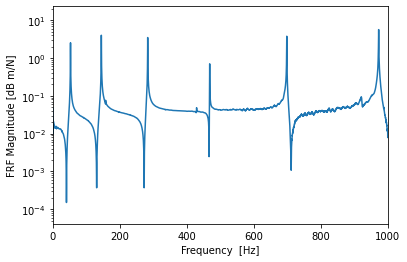

In [9]:
plt.semilogy(data[4]['x'], np.abs(data[4]['data']))
plt.xlabel('Frequency  [Hz]')
plt.ylabel('FRF Magnitude [dB m/N]')
plt.xlim([0,1000])
plt.show()

Other keys in the *dataset* 58 are explained here: http://www.sdrl.uc.edu/sdrl/referenceinfo/universalfileformats/file-format-storehouse/universal-dataset-number-58 Similarly we could read the data from *dataset* 55 that is used for modal data.

## Write measurement data to UFF file

Here you can see a minimal working example for writing three measured accelerance FRF data to the UFF file *measurement_123.uff*. First we load the accelerances:

In [10]:
measurement_point_1 = np.genfromtxt('data/meas_point_1.txt', dtype=complex)
measurement_point_2 = np.genfromtxt('data/meas_point_2.txt', dtype=complex)
measurement_point_3 = np.genfromtxt('data/meas_point_3.txt', dtype=complex)

In [11]:
measurement_point_1[0] = np.nan*(1+1.j)

In [12]:
measurement_point_1

array([        nan       +nanj, -0.17515115-0.12042372j,
        0.09362347+0.02570918j, ..., -0.54654555+0.00535394j,
       -0.5316    +0.00659625j, -0.53797177+0.01138392j])

In [13]:
measurement = [measurement_point_1, measurement_point_2, measurement_point_3]

In the next step we create a UFF file where we add *dataset* 58 for each measurement point consisting of the dictionary-like *keys* containing the measurement data and the information about the mesurement point.

In [14]:
for i in range(3):
    print('Adding point {:}'.format(i + 1))
    response_node = 1
    response_direction = 1
    reference_node = i + 1
    reference_direction = 1
    acceleration_complex = measurement[i]
    frequency = np.arange(0, 1001)
    name = 'TestCase'
    data = {'type':58, 
            'func_type':4, 
            'rsp_node': response_node, 
            'rsp_dir': response_direction, 
            'ref_dir': reference_direction, 
            'ref_node': reference_node,
            'data': acceleration_complex,
            'x': frequency,
            'id1': 'id1', 
            'rsp_ent_name': name,
            'ref_ent_name': name,
            'abscissa_spacing':1,
            'abscissa_spec_data_type':18,
            'ordinate_spec_data_type':12,
            'orddenom_spec_data_type':13}
    uffwrite = pyuff.UFF('./data/measurement.uff')
    uffwrite.write_sets(data, 'add')

Adding point 1
Adding point 2
Adding point 3


Note: If we run upper example twice we add the data two-times! `._write_set` Does not check if the nodal responses are allready written in the file, it just writes the defined dataset at the end of choosen file!

If you would like to write is as dataset 58b, all you need to add is the key `binary: 1` (which is by default `0`). 

The data dictionary in the example below is built using the ``prepare_58()`` function.

In [16]:
for i in range(3):
    print('Adding point {:}'.format(i + 1))
    response_node = 1
    response_direction = 1
    reference_node = i + 1
    reference_direction = 1
    acceleration_complex = measurement[i]
    frequency = np.arange(0, 1001)
    name = 'TestCase'
    
    data = pyuff.prepare_58(
        binary=1,
        func_type=4,
        rsp_node=response_node,
        rsp_dir=response_direction,
        ref_dir=reference_direction,
        ref_node=reference_node,
        data=acceleration_complex,
        x=frequency,
        id1='id1',
        rsp_ent_name=name,
        ref_ent_name=name,
        abscissa_spacing=1,
        abscissa_spec_data_type=18,
        ordinate_spec_data_type=12,
        orddenom_spec_data_type=13)
    
    uffwrite = pyuff.UFF('./data/measurement_58b.uff')
    uffwrite.write_sets(data, 'add')

Adding point 1
Adding point 2
Adding point 3


## The ``prepare_xx()`` functions

The new ``prepare_xx()`` functions enable easy dictionary construction. 

Each function contains the arguments that are available for a certain dataset and the arguments are documented in the docstring along with the reference to the **record** and **field** in the UFF file.

All of the docstrings are available in the ``pyUFF`` [documentation](https://pyuff.readthedocs.io/en/latest/index.html). To see the docstring for, e.g., ``prepare_15()`` function:

In [17]:
? pyuff.prepare_15

Signature:
 pyuff.prepare_15(
    node_nums=None,
    def_cs=None,
    disp_cs=None,
    color=None,
    x=None,
    y=None,
    z=None,
    return_full_dict=False,
)
Docstring:
Name: Nodes

R-Record, F-Field

:param node_nums: R1 F1, node label
:param def_cs: R1 F2, deformation coordinate system numbers, optional
:param disp_cs: R1 F3, displacement coordinate system numbers, optional
:param color: R1 F4, color, optional
:param x: R1 F5, Dimensional coordinate of node in the definition system
:param y: R1 F6, Dimensional coordinate of node in the definition system
:param z: R1 F7, Dimensional coordinate of node in the definition system

:param return_full_dict: If True full dict with all keys is returned, else only specified arguments are included

**Test prepare_15**

>>> save_to_file = 'test_pyuff'
>>> dataset = pyuff.prepare_15(
>>>     node_nums=[16, 17, 18, 19, 20],
>>>     def_cs=[11, 11, 11, 12, 12],
>>>     disp_cs=[16, 16, 17, 18, 19],
>>>     color=[1, 3, 4, 5, 6],  # I10,
>>